# Correlating Growth Using World Bank Development Indicators

Sean McSkeane, Albert Chu, Sonny Liu

![World Bank Logo](images/worldBank.png "World Bank")

### Table of Contents

- Background
    - Introduction
    - Defintions
- Data Collection
    - Libraries
    - Data
- Data Processing
    - Creation of Prediction Data
    - Creation of Miscellaneous
- Exploratory Analysis and Data Visualization
    - Prediction Data Summary and Plots
    - Miscellaneous Data Summary and Plots
    - GDP Growth Map
- Analysis, Hypothesis Testing, and Machine Learning
    - Prediction
- Insight and Policy Design
    - Conclusion

## <center>Background<center>

### 1.0 Introduction

Economists are constantly making predictions about world economies with economic models and forecasts. In this analysis, we attempt to correlate the percentage growth of GDP per capita for nations using data provided by the World Bank. The World Bank is an international financial institution based in Washington D.C. that provides loans and grants to the governments of poorer countries for the purpose of pursuing capital projects. One of the major goals of the World Bank is to end extreme poverty in developing nations.

We use data provided from the [World Bank's World Development Indicators](https://databank.worldbank.org/source/world-development-indicators) to create our own custom comma-separated values (CSV) file for our own data analysis. According to the World Bank's website, "World Development Indicators (WDI) is the primary World Bank collection of development indicators, compiled from officially recognized international sources. It presents the most current and accurate global development data available, and includes national, regional and global estimates." 

In our analysis we attempt to predict the growth of nations by cleaning and reorganizing, plotting important economic factors across time, correlating other factors with gdp per capita, and using machine learning to predict future growth.

### 1.1 Definitions

Here are definitions of the datapoints we use directly taken from the [World Bank.](https://databank.worldbank.org/metadataglossary/world-development-indicators/series)

GDP:
> GDP stands for gross domestic product. It is used to measure the market value of all the final goods and services produced in a specific time period.

Per Capita:
> Per capita simply is an economic term that means per person in a specefied area.

Final Consumption Expenditure:
> Final consumption expenditure (formerly total consumption) is the sum of household final consumption expenditure (private consumption) and general government final consumption expenditure (general government consumption). This estimate includes any statistical discrepancy in the use of resources relative to the supply of resources.

General government final consumption expenditure (current US$):
> General government final consumption expenditure (formerly general government consumption) includes all government current expenditures for purchases of goods and services (including compensation of employees). It also includes most expenditures on national defense and security, but excludes government military expenditures that are part of government capital formation. Data are in current U.S. dollars.

Foreign direct investment, net inflows (BoP, current US$):
> Foreign direct investment refers to direct investment equity flows in the reporting economy. It is the sum of equity capital, reinvestment of earnings, and other capital. Direct investment is a category of cross-border investment associated with a resident in one economy having control or a significant degree of influence on the management of an enterprise that is resident in another economy. Ownership of 10 percent or more of the ordinary shares of voting stock is the criterion for determining the existence of a direct investment relationship. Data are in current U.S. dollars.

Exports of goods and services (current US$):
> Exports of goods and services comprise all transactions between residents of a country and the rest of the world involving a change of ownership from residents to nonresidents of general merchandise, net exports of goods under merchanting, nonmonetary gold, and services. Data are in current U.S. dollars.

Imports of goods and services (current US$):
> Imports of goods and services comprise all transactions between residents of a country and the rest of the world involving a change of ownership from nonresidents to residents of general merchandise, nonmonetary gold, and services. Data are in current U.S. dollars.

### 1.2 Libraries

The following python libraries used are listed below along with their official descriptions:

* pandas - an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language ([docs](https://pandas.pydata.org/))
* numpy - NumPy is the fundamental package for scientific computing with Python ([docs](https://numpy.org/))
* matplotlib - Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms ([docs](https://matplotlib.org/))
* seaborn - Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics ([docs](https://seaborn.pydata.org/))
* sklearn - Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities ([docs](https://scikit-learn.org/stable/))
* statsmodels - is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration ([docs](https://www.statsmodels.org/stable/index.html))
* folium - makes it easy to visualize data that’s been manipulated in Python on an interactive leaflet map. ([docs](https://python-visualization.github.io/folium/))


In [3]:
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import model_selection
from statsmodels import api as sm
import folium
import json

### 1.3 Context
According to [investopedia](https://www.investopedia.com/terms/e/economic-forecasting.asp), "Economic forecasting is the process of attempting to predict the future condition of the economy using a combination of important and widely followed indicators. Economic forecasting involves the building of statistical models with inputs of several key variables, or indicators, typically in an attempt to come up with a future gross domestic product (GDP) growth rate. Primary economic indicators include inflation, interest rates, industrial production, consumer confidence, worker productivity, retail sales, and unemployment rates."

Economic predicitons are incredibly important for buisnesses and governments world wide. They want to manage their finances accoridingly so that they can encourage growth and mitigate losses. However, many descriped economic forecasting as unreliable. Investopedia goes on to even state that "Economic forecasting is often described as a flawed science." According to [Bloomberg Buisness](https://www.bloomberg.com/news/articles/2019-03-28/economists-are-actually-terrible-at-forecasting-recessions), "A recent working [paper](https://www.imf.org/en/Publications/WP/Issues/2018/03/05/How-Well-Do-Economists-Forecast-Recessions-45672) by Zidong An, Joao Tovar Jalles, and Prakash Loungani discovered that of 153 recessions in 63 countries from 1992 to 2014, only five were predicted by a consensus of private-sector economists in April of the preceding year." This shows that economies are far too complex for even large agencies to forecast accurately, and that economic models are often misleading.

![Missed Predictions](images/misses.png "Bloomberg Data")
source from [Bloomberg Buisness](https://www.bloomberg.com/news/articles/2019-03-28/economists-are-actually-terrible-at-forecasting-recessions)

In this project, we attempt to correlate GDP growth with several important key data points and even attempt to make our own prediction model. Why are we pursuing this fruitless objective when the world's best economists cannot make an accurate model? Mainly to get an intuition at the challenges economists face and also to see how far data science and programming can help amatuers like ourselves tackle the seemingly impossible.  

## <center>Data Processing<center>

### 2.0  Data Collection
The formula for calculating GDP is:

    GDP = Consumption + Investment + Government Spending + Net Exports

therefore we concluded it would be best if we split the CSV into two dataframes which included GDP calculators and another dataframe from more miscellenous data.

We searched through the World Bank Development Indicators in order to find datapoints that matched the formula as close as possible. We also chose datapoints that we found interesting and/or could possibly have a correlation with GDP per capita and GDP growth. Our datset is availble [here](https://github.com/thechuster/thechuster.github.io/blob/albert/WorldBankData/data.csv) at the project's github page.

In [10]:
worldBankDevInc = pd.read_csv("WorldBankData/data.csv")

worldBankDevInc.dropna(inplace=True)
countryName = ""
first = True
newRows = []
countriesData = []

for index, row in worldBankDevInc.iterrows():
    if (countryName != row["Country Name"]):
        if (first == False):
            #CHOSE WHAT YEARS TO DROP HERE
#             df = df.drop(df.loc[:, '1960 [YR1960]':'1999 [YR1999]'].columns, axis = 1)  
            countriesData.append(df)
            # IF YOU WANT TO SEE ALL COUNTRIES DATA UNCOMMENT THIS
            #with pd.option_context('display.max_rows', None, 'display.max_columns', None):
                #display(df)
        countryName = row["Country Name"]
        df = pd.DataFrame(columns=worldBankDevInc.columns) 
        first = False
        
    df = df.append(row, ignore_index=True)

worldData = pd.concat(countriesData)
# df  = df.drop(df.loc[:, '1960 [YR1960]':'1999 [YR1999]'].columns, axis = 1) 
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)
    display(countriesData[206])

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],1967 [YR1967],1968 [YR1968],1969 [YR1969],1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,World,WLD,"Adjusted net enrollment rate, primary (% of pr...",SE.PRM.TENR,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,89.7470779418945,..,89.8867263793945,89.73896,89.76079,90.09036,90.28756,90.44798,90.30999,90.5136,90.48209,90.45493,..
1,World,WLD,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,..,..,..,..,..,..,..,..,..,..,..,3.82455669177821,5.53180688564998,6.29191447750782,-1.36409149911428,0.775066291042961,4.87383091854163,3.75054299401589,4.63630589579466,1.79554937138471,0.517066830716701,1.86491290260848,0.805927335815127,3.56140417297873,5.97931692584852,5.20987950069849,3.43433144008054,2.74956267290972,2.54309818952851,3.61798510751402,3.00650855197931,1.46301808779616,2.4680809839501,1.71835487641421,3.74858458862741,3.29835475775853,2.21669252517704,3.62068678447997,1.55599024690241,2.79115821485058,3.44953652132376,1.87066384914678,3.61999537345889,1.57430765382489,5.52540304277476,3.41670430543519,4.79799348316917,5.13918913741134,-0.108027864217718,-1.0217153334587,4.82408306126788,2.91431395916423,3.08983534636607,2.27578094371812,3.01262664499615,3.13334710859108,2.35749617104845,3.00433197520826,..,..
2,World,WLD,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
3,World,WLD,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,8.56202153951592,8.9627248859483,9.30874245225373,9.458788244142,9.34750634702223,9.29471275406602,9.20008442422269,9.04112199123932,9.06090065244793,9.82514331356262,9.56935837112177,9.45270493564931,9.46374185948091,9.50753125576719,9.59698254405745,9.88628070186998,10.0231959648361,..,..,..
4,World,WLD,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,43.8002650137584,43.6365914248492,42.8938027932221,42.2060851083481,41.3664043310787,40.6965624449873,40.2624711329534,40.2381994624912,40.1991446935927,40.0648979418348,39.7327187451559,39.508811405597,39.0601063609179,38.0021749104642,37.1021712566213,35.9629867428729,35.0148042564423,34.42401720717,33.8572454843509,33.1967643212232,32.2266382221097,31.2779769403582,30.5013693112494,29.7013114430674,29.1733692090603,28.8098172705724,28.4093104076149,28.2649635947778,28.1411866629902
5,World,WLD,Employment in industry (% of total employment)...,SL.IND.EMPL.ZS,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,21.6516925324977,21.527138324844,21.6117847103248,21.6964127337876,21.823627158468,21.8885375999451,21.787656173132,21.4629106755983,21.3136240854945,21.2086816957152,21.1149087439687,20.9815466985686,21.0058224818388,21.3241094091881,21.6263803354217,21.9834910554221,22.2665665618542,22.

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],1967 [YR1967],1968 [YR1968],1969 [YR1969],1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,United States,USA,"Adjusted net enrollment rate, primary (% of pr...",SE.PRM.TENR,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,81.6253967285156,..,..,..,..,..,..,..,..,..,..,93.3478088378906,95.2786483764648,..,..,98.8609085083008,98.8573913574219,..,96.9185333251953,96.2886962890625,97.2522201538086,96.1293869018555,..,..,..,97.71185,98.42669,97.36396,97.74179,98.06465,99.43481,99.30372,99.77238,99.62092,98.33983,97.63436,96.38975,97.26517,97.50924,97.97434,98.19414,99.64003,95.55776,..,..
1,United States,USA,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,..,..,..,..,..,..,..,..,..,..,..,2.82072687989353,4.78293619252381,6.12444910299685,-4.41221612408582,-0.45080218246153,4.64086184304826,4.40860025267118,5.23352339631104,-0.760885569357512,-2.43005547342601,4.3242158204319,0.870203901637282,3.40326296506279,8.10674351658398,4.25066537828623,3.5814530772634,3.75845398650638,5.82824503108708,2.21138114914001,1.21768386051795,0.449947887381057,3.48067522642867,2.32026276379192,4.54252119324556,3.27148288766921,4.44954155767037,5.40268531470242,5.94581897679211,4.16749984921016,3.59713179891652,1.92304440239846,1.36977173138115,2.40007651531626,3.7122434677844,2.5171568336751,3.54982788692119,0.520708736578129,-2.42292639916755,-1.29630962630627,3.19978278462472,2.28606067023425,4.27359272268313,1.28811495974573,3.61811766052482,3.1843378764558,0.565980705380852,2.83426174365306,..,..
2,United States,USA,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,..,..,..,..,..,..,..,..,..,..,937510234909.97,1015409860355.56,1113237940032.86,1252476213205.58,1315564678836.84,1416531842515.86,1572330818506.82,1757061954579.54,1988493330853.55,2148972586425.86,2302714526273.35,2632733298444.46,2787751420783.85,2988711181122.32,3370698430676.17,3613579716247.4,3816375213867.74,4072933970058.58,4458697559759.45,4737937779807.58,4978802874389.38,5148953031205.18,5455783087975.63,5712110818966.12,6105794399121.82,6442201380022.6,6853506178065.24,7339074352162.23,7834962618624.28,8293245975623.27,8812709777888.21,9139188106939.03,9394461176709.74,9816428787969.95,10478036952207,11117320814516.6,11872790551256.1,12251856447577.3,12295805003953.1,12086574023079,12655135542015.3,13258084627100.6,14068520607491.8,14454861303519.9,15230832051674.8,15772023624639.7,15985139599881,16740180419866.7,..,..
3,United States,USA,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,12.5020673,13.16894835,13.95448455,14.45482881,14.53652482,14.54146429,14.65803467,14.89823642,15.29436988,16.34297083,16.41288147,16.36738026,16.36637753,16.33083781,16.50510561,16.81565916,17.07341533,..,..,..
4,United States,USA,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,2.77699995040894,2.74000000953674,2.58999991416931,2.76999998092651,2.75399994850159,2.71700000762939,2.62299990653992,2.56900000572205,2.45799994468689,1.61800003051758,1.513

Above are two raw dataframes of the data from the the CSV file obtained from the world bank. One of them shows world statistics and the other shows statistics from the United States. The list ```contriesData``` in our code simply contains a dataframe for each country or region that the World Bank provides. If you wish to see a certain country you can change the index of ```display(CountriesData[n])``` to be whatever country you wish to see.

### 2.1 Creation of Prediction Data

The predictionData dataframe consists of variables that are known to calculate GDP. The dataframe was built using the worldData dataframe and consists of columns for country, year, GDP per capita (current US), GDP per capita growth (annual percentage), final consumption expenditure (percentage of GDP), final consumption expenditure (current US), general government final consumption expenditure (current US), general government final consumption expenditure (percentage of GDP), foreign direct investment, net inflows (percentage of GDP), foreign direct investment, net inflows (BoP, current US), exports of goods and services (current US), imports of goods and services (current US), exports of goods and services (percentage of GDP), and imports of goods and services (% of GDP).

The dataframe contains one row for each combination of country and year, with the remaining values in the row corresponding to the variables listed above. However, only years from 2000 to 2015 were included to ensure minimal missing data, as years prior to 2000 were more likely to be missing data. An important factor to note that it is there was no data point calculating total investments for any nation. Therefore we used one metric of investment which was Foreign Direct Investment as an indicator of investment for a country.

In [14]:
predictionData = pd.DataFrame(columns = ["Country Name", "Year"])

countriesList = worldData["Country Name"]
for name in countriesList.unique():
        counter = 2000
        while counter <= 2015:
            predictionData = predictionData.append({"Country Name": name, "Year": counter}, ignore_index=True)
            counter += 1

predictionData["GDP per capita (current US$)"] = 0.0
predictionData["GDP per capita growth (annual %)"] = 0.0
predictionData["Final consumption expenditure (% of GDP)"] = 0.0
predictionData["Final consumption expenditure (current US$)"] = 0.0
predictionData["General government final consumption expenditure (current US$)"] = 0.0
predictionData["General government final consumption expenditure (% of GDP)"] = 0.0
predictionData["Foreign direct investment, net inflows (% of GDP)"] = 0.0
predictionData["Foreign direct investment, net inflows (BoP, current US$)"] = 0.0
predictionData["Exports of goods and services (current US$)"] = 0.0
predictionData["Imports of goods and services (current US$)"] = 0.0
predictionData["Exports of goods and services (% of GDP)"] = 0.0
predictionData["Imports of goods and services (% of GDP)"] = 0.0

country = "Afghanistan"
countryCounter = 0
for index, row in worldData.iterrows():
    if row["Country Name"] != country:
        countryCounter += 1
        country = row["Country Name"]
    if row["Series Name"] in predictionData.columns:
        counter = 2000
        while counter <= 2015:
            yearString = str(counter) + " [YR" + str(counter) + "]"
            indx = countryCounter * 16 + (counter - 2000)
            if row[yearString] != "..":
                predictionData.at[indx, row["Series Name"]] = row[yearString]
            else:
                predictionData.at[indx, row["Series Name"]] = np.nan
            counter += 1

predictionData.drop(predictionData.index[3472:], inplace=True)    
        
predictionData.head()

,Country Name,Year,GDP per capita (current US$),GDP per capita growth (annual %),Final consumption expenditure (% of GDP),Final consumption expenditure (current US$),General government final consumption expenditure (current US$),General government final consumption expenditure (% of GDP),"Foreign direct investment, net inflows (% of GDP)","Foreign direct investment, net inflows (BoP, current US$)",Exports of goods and services (current US$),Imports of goods and services (current US$),Exports of goods and services (% of GDP),Imports of goods and services (% of GDP)
0,Afghanistan,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170000.0,NaN,NaN,NaN,NaN
1,Afghanistan,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,680000.0,NaN,NaN,NaN,NaN
2,Afghanistan,2002,179.426494,NaN,132.122532,5.357802e+09,3.453616e+08,8.516561,1.232992,50000000.0,1.329281e+09,2.851980e+09,32.779841,70.329362
3,Afghanistan,2003,190.684009,3.868362,147.518576,6.661295e+09,4.482138e+08,9.925977,1.280017,57800000.0,2.003508e+09,3.250916e+09,44.368948,71.993593
4,Afghanistan,2004,211.381970,-2.875184,139.652624,7.299329e+09,5.587055e+08,10.689296,3.575819,186900000.0,1.616202e+09,3.170767e+09,30.921587,60.663923


### 2.2 Creation of Miscellenous Data

The miscellaneousData dataframe consists of variables we thought would have a correlation to GDP growth. The dataframe was built using the worldData dataframe and consists of columns for country, year, GDP per capita (current US), employment in agriculture (% of total employment) (modeled ILO estimate), employment in industry (% of total employment) (modeled ILO estimate), employment in services (% of total employment) (modeled ILO estimate), current health expenditure (% of GDP), fertility rate, total (births per woman), government expenditure on education, total (% of GDP), prevalence of undernourishment (% of population), adjusted net enrollment rate, primary (% of primary school age children).

The dataframe contains one row for each combination of country and year, with the remaining values in the row corresponding to the variables listed above. However, only years from 2000 to 2015 were included to ensure minimal missing data, as years prior to 2000 were more likely to be missing data.

In [5]:
miscellaneousData = pd.DataFrame(columns = ["Country Name", "Year"])

countriesList = worldData["Country Name"]
for name in countriesList.unique():
    counter = 2000
    while counter <= 2015:
        miscellaneousData = miscellaneousData.append({"Country Name": name, "Year": counter}, ignore_index=True)
        counter += 1

miscellaneousData["GDP per capita (current US$)"] = 0.0
miscellaneousData["Employment in agriculture (% of total employment) (modeled ILO estimate)"] = 0.0
miscellaneousData["Employment in industry (% of total employment) (modeled ILO estimate)"] = 0.0
miscellaneousData["Employment in services (% of total employment) (modeled ILO estimate)"] = 0.0
miscellaneousData["Current health expenditure (% of GDP)"] = 0.0
miscellaneousData["Fertility rate, total (births per woman)"] = 0.0
miscellaneousData["Government expenditure on education, total (% of GDP)"] = 0.0
miscellaneousData["Prevalence of undernourishment (% of population)"] = 0.0
miscellaneousData["Adjusted net enrollment rate, primary (% of primary school age children)"] = 0.0

country = "Afghanistan"
countryCounter = 0
for index, row in worldData.iterrows():
    if row["Country Name"] != country:
        countryCounter += 1
        country = row["Country Name"]
    if row["Series Name"] in miscellaneousData.columns:
        counter = 2000
        while counter <= 2015:
            yearString = str(counter) + " [YR" + str(counter) + "]"
            indx = countryCounter * 16 + (counter - 2000)
            if row[yearString] != "..":
                miscellaneousData.at[indx, row["Series Name"]] = row[yearString]
            else:
                miscellaneousData.at[indx, row["Series Name"]] = np.nan
            counter += 1

miscellaneousData.drop(predictionData.index[3472:], inplace=True) 

miscellaneousData.head()

,Country Name,Year,GDP per capita (current US$),Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),Current health expenditure (% of GDP),"Fertility rate, total (births per woman)","Government expenditure on education, total (% of GDP)",Prevalence of undernourishment (% of population),"Adjusted net enrollment rate, primary (% of primary school age children)"
0,Afghanistan,2000,NaN,69.094002,8.007,22.899000,NaN,7.485,NaN,46.1,NaN
1,Afghanistan,2001,NaN,70.317001,7.434,22.250000,NaN,7.387,NaN,46.4,NaN
2,Afghanistan,2002,179.426494,63.477001,10.195,26.327999,9.443391,7.272,NaN,43.7,NaN
3,Afghanistan,2003,190.684009,62.699001,10.437,26.864000,8.941259,7.148,NaN,39.8,NaN
4,Afghanistan,2004,211.381970,62.534000,10.715,26.750000,9.808473,7.016,NaN,36.1,NaN


## <center>Exploratory Analysis and Data Visualization<center>

### 3.0 Prediction Data Summary and Plots

The following table below provides us with the statistics from the variables that are involved with calculating GDP. These only utilize the information contained in predictionData.

In [77]:
predictionData.describe()

,Year,GDP per capita (current US$),GDP per capita growth (annual %),Final consumption expenditure (% of GDP),Final consumption expenditure (current US$),General government final consumption expenditure (current US$),General government final consumption expenditure (% of GDP),"Foreign direct investment, net inflows (% of GDP)","Foreign direct investment, net inflows (BoP, current US$)",Exports of goods and services (current US$),Imports of goods and services (current US$),Exports of goods and services (% of GDP),Imports of goods and services (% of GDP)
count,3472.000000,3270.000000,3241.000000,2755.000000,2.740000e+03,2.729000e+03,2739.000000,3027.000000,3.153000e+03,2.989000e+03,2.989000e+03,3004.000000,3004.000000
mean,2007.500000,13819.110697,2.388447,80.727680,2.452857e+11,5.528432e+10,16.521889,8.572102,9.019164e+09,8.444386e+10,8.265407e+10,43.255086,49.490405
std,4.610436,21923.158400,5.629381,19.851309,1.021754e+12,2.085425e+11,8.029543,48.499468,3.481636e+10,2.288171e+11,2.397827e+11,31.949753,30.206760
min,2000.000000,111.927224,-62.378077,12.173205,1.786634e+08,3.088705e+07,0.951747,-58.322880,-2.967943e+10,7.960111e+06,1.144018e+07,0.099465,0.064705
25%,2003.750000,1253.937370,0.190517,71.252935,5.264093e+09,9.077000e+08,11.682325,1.256553,7.977169e+07,1.367965e+09,2.129926e+09,24.455476,30.263562
50%,2007.500000,4311.495421,2.322977,79.812924,1.876980e+10,3.391895e+09,15.745053,3.137152,5.552521e+08,7.503513e+09,8.350275e+09,36.430283,43.609913
75%,2011.250000,16949.803274,4.596447,90.965881,1.114418e+11,2.366861e+10,19.488833,6.506880,3.352997e+09,5.508020e+10,4.926399e+10,53.251363,60.658136
max,2015.000000,189170.895671,121.779543,241.973940,1.490724e+13,2.612706e+12,135.809438,1282.632552,7.340103e+11,2.462839e+12,2.879284e+12,433.223529,427.576471


Although this information is useful to look at when looking at the big picture, it would be more interesting to see how these variables have changed overtime. In the boxplots below we seperate each datapoint as its own boxplot and plot them by five year intervals.

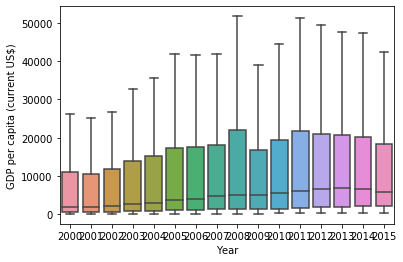

In [25]:
sns.boxplot(x="Year", y="GDP per capita (current US$)", data=predictionData, showfliers=False)

Text(0.5, 1.0, 'Year vs. GDP per capita')

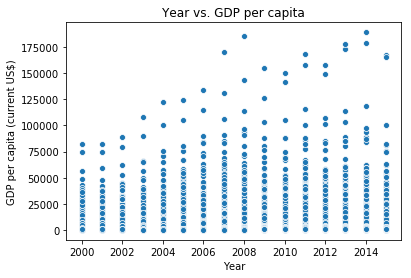

In [33]:
sns.scatterplot(x="Year", y="GDP per capita (current US$)", data=predictionData).set_title("Year vs. GDP per capita")

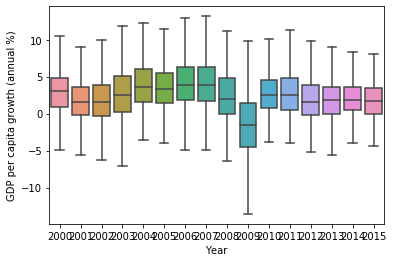

In [31]:
sns.boxplot(x="Year", y="GDP per capita growth (annual %)", data=predictionData, showfliers=False)

Text(0.5, 1.0, 'Year vs. GDP per capita growth (annual %)')

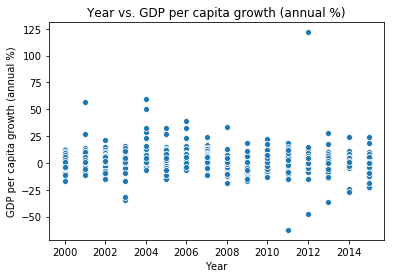

In [34]:
sns.scatterplot(x="Year", y="GDP per capita growth (annual %)", data=predictionData).set_title("Year vs. GDP per capita growth (annual %)")

Text(0.5, 1.0, 'Year vs. Final consumption expenditure')

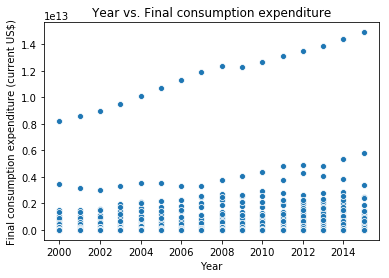

In [32]:
sns.scatterplot(x="Year", y="Final consumption expenditure (current US$)", data=predictionData).set_title("Year vs. Final consumption expenditure")

Text(0.5, 1.0, 'Year vs. General government final consumption expenditure')

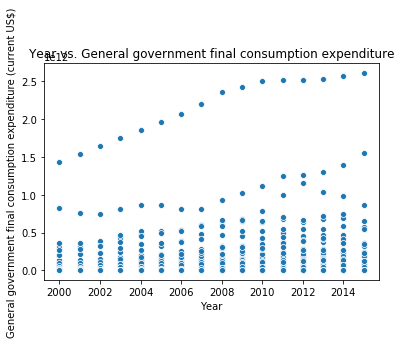

In [35]:
sns.scatterplot(x="Year", y="General government final consumption expenditure (current US$)", data=predictionData).set_title("Year vs. General government final consumption expenditure")

Text(0.5, 1.0, 'Year vs. Foreign direct investment, net inflows (BoP, current US$)')

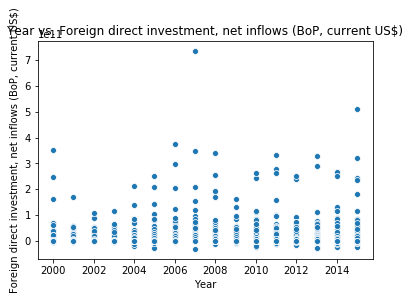

In [36]:
sns.scatterplot(x="Year", y="Foreign direct investment, net inflows (BoP, current US$)", data=predictionData).set_title("Year vs. Foreign direct investment, net inflows (BoP, current US$)")

Text(0.5, 1.0, 'Exports of goods and services (current US$)')

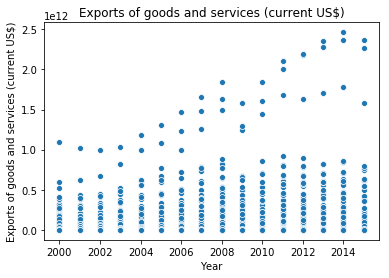

In [37]:
sns.scatterplot(x="Year", y="Exports of goods and services (current US$)", data=predictionData).set_title("Exports of goods and services (current US$)")

Text(0.5, 1.0, 'Exports of goods and services (current US$)')

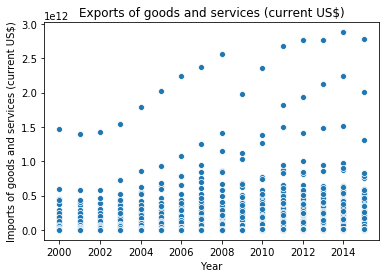

In [38]:
sns.scatterplot(x="Year", y="Imports of goods and services (current US$)", data=predictionData).set_title("Exports of goods and services (current US$)")

### Miscellaneous Data Summary and Plots

In [16]:
miscellaneousData.describe()

,GDP per capita (current US$),Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),Current health expenditure (% of GDP),"Fertility rate, total (births per woman)","Government expenditure on education, total (% of GDP)",Prevalence of undernourishment (% of population),"Adjusted net enrollment rate, primary (% of primary school age children)"
count,3990.000000,3712.000000,3712.000000,3712.000000,3704.000000,3937.000000,1871.000000,3324.000000,2424.000000
mean,12840.332986,30.099654,19.810493,50.089872,6.171237,2.978158,4.503243,12.784069,89.892001
std,20578.005360,23.758027,7.912705,18.568244,2.789795,1.517292,1.816796,11.509354,12.185349
min,111.927224,0.180000,2.051000,5.377000,1.024978,0.860000,0.787440,2.500000,26.895430
25%,1272.155890,7.963750,14.136000,35.154501,4.346333,1.800000,3.216830,3.000000,87.166593
50%,4152.963263,25.051000,20.727506,51.589001,5.509363,2.482996,4.363220,9.000000,94.810600
75%,15141.364903,48.155857,25.010750,65.353114,7.719829,4.007000,5.490590,18.755584,97.795216
max,189170.895671,92.547997,59.576000,87.990997,27.417822,7.679000,18.161070,71.500000,100.000000


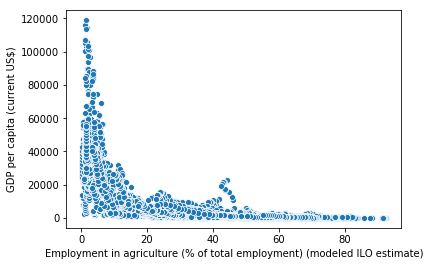

In [17]:
sns.scatterplot(x="Employment in agriculture (% of total employment) (modeled ILO estimate)", y="GDP per capita (current US$)", data=miscellaneousData)

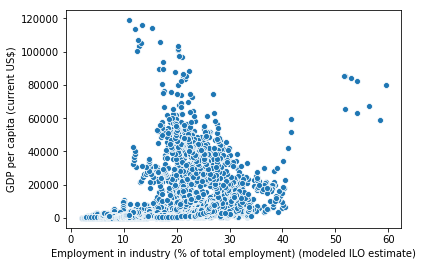

In [18]:
sns.scatterplot(x="Employment in industry (% of total employment) (modeled ILO estimate)", y="GDP per capita (current US$)", data=miscellaneousData)

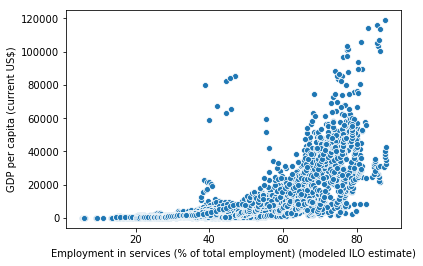

In [19]:
sns.scatterplot(x="Employment in services (% of total employment) (modeled ILO estimate)", y="GDP per capita (current US$)", data=miscellaneousData)

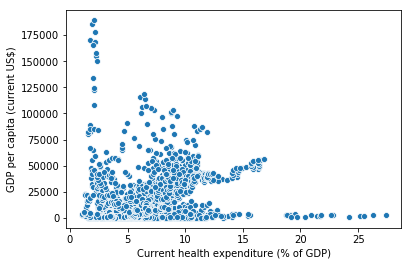

In [20]:
sns.scatterplot(x="Current health expenditure (% of GDP)", y="GDP per capita (current US$)", data=miscellaneousData)

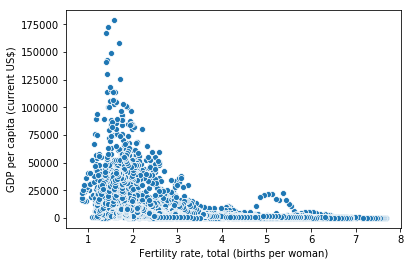

In [21]:
sns.scatterplot(x="Fertility rate, total (births per woman)", y="GDP per capita (current US$)", data=miscellaneousData)

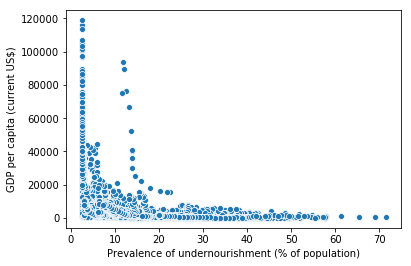

In [22]:
sns.scatterplot(x="Prevalence of undernourishment (% of population)", y="GDP per capita (current US$)", data=miscellaneousData)

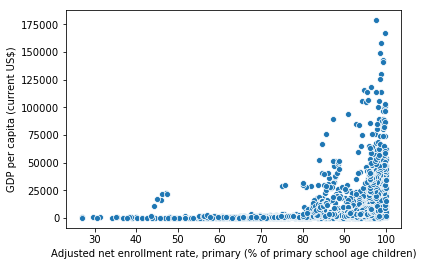

In [23]:
sns.scatterplot(x="Adjusted net enrollment rate, primary (% of primary school age children)", y="GDP per capita (current US$)", data=miscellaneousData)

### GDP Growth Map (Not Done)

In [73]:
worldCountries = pd.read_json("world-countries.json")

mapPredictors = predictors

#for index, row in mapPredictors.iterrows():
#    if row["countryName"] not in worldCountries.name:
#        mapPredictors.drop([index], axis=0, inplace=True)

worldCountries.head()

,type,features
0,FeatureCollection,"{'type': 'Feature', 'properties': {'name': 'Af..."
1,FeatureCollection,"{'type': 'Feature', 'properties': {'name': 'An..."
2,FeatureCollection,"{'type': 'Feature', 'properties': {'name': 'Al..."
3,FeatureCollection,"{'type': 'Feature', 'properties': {'name': 'Un..."
4,FeatureCollection,"{'type': 'Feature', 'properties': {'name': 'Ar..."


In [74]:
#worldCountries 

# NEED COUNTRIES IN dataGDP to match countries in worldCountries.

m = folium.Map(location=[37, -102], zoom_start=5)

#folium.Choropleth(
#    geo_data="world-countries.json",
#    name='choropleth',
#    data=dataGDP,
#    columns=['Country Name', 'GDP2015'],
#    key_on='feature.id',
#    fill_color='YlGn',
#    fill_opacity=0.7,
#    line_opacity=0.2,
#    legend_name='Unemployment Rate (%)'
#).add_to(m)

folium.LayerControl().add_to(m)

m

## <center>Analysis, Hypothesis Testing, and Machine Learning<center>

In [76]:
predictionData = predictionData.astype({"Year": float})

predictionData.head()

,Country Name,Year,GDP per capita (current US$),GDP per capita growth (annual %),Final consumption expenditure (% of GDP),Final consumption expenditure (current US$),General government final consumption expenditure (current US$),General government final consumption expenditure (% of GDP),"Foreign direct investment, net inflows (% of GDP)","Foreign direct investment, net inflows (BoP, current US$)",Exports of goods and services (current US$),Imports of goods and services (current US$),Exports of goods and services (% of GDP),Imports of goods and services (% of GDP)
0,Afghanistan,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170000.0,NaN,NaN,NaN,NaN
1,Afghanistan,2001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,680000.0,NaN,NaN,NaN,NaN
2,Afghanistan,2002.0,179.426494,NaN,132.122532,5.357802e+09,3.453616e+08,8.516561,1.232992,50000000.0,1.329281e+09,2.851980e+09,32.779841,70.329362
3,Afghanistan,2003.0,190.684009,3.868362,147.518576,6.661295e+09,4.482138e+08,9.925977,1.280017,57800000.0,2.003508e+09,3.250916e+09,44.368948,71.993593
4,Afghanistan,2004.0,211.381970,-2.875184,139.652624,7.299329e+09,5.587055e+08,10.689296,3.575819,186900000.0,1.616202e+09,3.170767e+09,30.921587,60.663923


### Linear Regression

In [ ]:
X = predictors[["Current health expenditure (% of GDP)", "Government expenditure on education, total (% of GDP)", "Prevalence of undernourishment (% of population)"]]
y = predictors[["GDP per capita (current US$)"]]
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
lm.score(X,y)

### OLS Regression

In [ ]:
ols_y = y
ols_X = X

#add a constant to the features
ols_X = sm.add_constant(ols_X)

# use Ordinary Least Squares
OLS_model = sm.OLS(ols_y, ols_X).fit()
OLS_model.summary()

### Predictions

In [ ]:
# create training and testing data from same X and y used in regression above
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

# create and fit the model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

# generate predictions for player Rating to compare with y_test data
predictions = lm.predict(X_test)

plt.figure(figsize=(8,8))
plt.title("Predicted vs. Actual Values for GDP", fontsize=16)
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, color="Red") # identity line y=x
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

## <center>Insight and Policy Decision<center>

## Conclusion